# 6. AMES HOUSING: THE LINEAR REGRESSION MODEL
---

## 1. Instance-Based Learning vs. Model-Based Learning
- `Instance-Based Learning:` the algorithm relies completely on previous instances to make predictions. 
    - Ex.: The k-nearest neighbors algorithm doesn't try to understand or capture the relationship between the feature columns and the target column. That's why the K-nearest neighbors is known as an instance-based learning algorithm
- `Model-Based Learning:`, aka `Parametric Machine Learning`, the result of the training process for these machine learning algorithms is a mathematical function that best approximates the patterns in the training set. 
    - Ex.: In linear regression, the approximate relationship between the feature columns and the target column is expressed as a linear regression equation:
    $$
    y = {a_1x_1 + a_2x_2 + a_3x_3+ ... + a_nx_n}
    $$

## 2. Introduction to the Data
- **Dataset:** Sold houses in Ames, Iowa
    - The data set contains 2930 observations and a large number of explanatory variables (23 nominal, 23 ordinal, 14 discrete, and 20 continuous) involved in assessing home values. [Link](https://www.tandfonline.com/doi/abs/10.1080/10691898.2011.11889627)
- **Origin:** Compiled by [Dean de Cock](https://www.truman.edu/faculty-staff/decock/) for the primary purpose of having a high quality dataset for regression
- Download [here](https://dsserver-prod-resources-1.s3.amazonaws.com/235/AmesHousing.txt)

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

ames = pd.read_csv('data/Ames_Housing.txt', delimiter="\t")
ames.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,TA,Attchd,1968.0,Fin,2.0,522.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


## 3. Train-Test Split

In [2]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(ames, test_size=0.2, random_state=42)
print(train.shape, test.shape)

X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']

X_test = test.drop('SalePrice', axis=1)
y_test = test['SalePrice']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

(2344, 82) (586, 82)


((2344, 81), (2344,), (586, 81), (586,))

## 4. Exploring the Correlation

In [3]:
corr_matrix = train.corr().abs()
corr_matrix["SalePrice"].sort_values(ascending=False).head(10)

SalePrice         1.000
Overall Qual      0.795
Gr Liv Area       0.698
Garage Cars       0.644
Garage Area       0.633
Total Bsmt SF     0.612
1st Flr SF        0.607
Year Built        0.545
Full Bath         0.542
Year Remod/Add    0.518
Name: SalePrice, dtype: float64

It looks like `Overall Qual` has the strongest linear relationship with `SalePrice`. Let's show the correlation heatmap of the best 10 features.

In [4]:
corr_cols = corr_matrix["SalePrice"].sort_values(ascending=False).head(10).to_dict()
corr_cols = list(corr_cols.keys())
corr_cols

['SalePrice',
 'Overall Qual',
 'Gr Liv Area',
 'Garage Cars',
 'Garage Area',
 'Total Bsmt SF',
 '1st Flr SF',
 'Year Built',
 'Full Bath',
 'Year Remod/Add']

<AxesSubplot:>

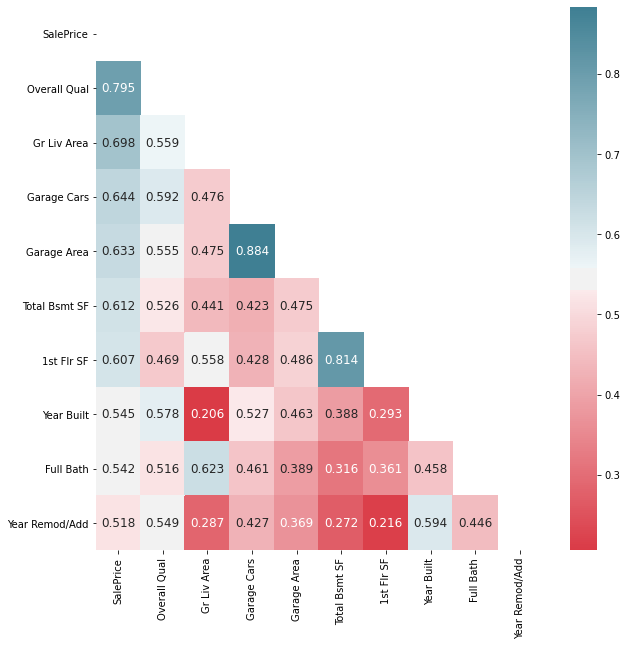

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = train[corr_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
color = sns.diverging_palette(10, 220, as_cmap=True)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, mask=mask, cmap=color, annot=True, 
            fmt=".3f", annot_kws={"size": 12})

## 5. Simple (Univariate) Linear Regression
Because one of the assumptions of linear regression is that the relationship between the features and the target column is linear, for our univariate model, we want to pick a feature that has the strongest linear correlation with the final sale price. In this case, it's `Overall Qual`.

Model: $ y = {a_1 * Overall Qual + a_0} $

<AxesSubplot:xlabel='Overall Qual', ylabel='SalePrice'>

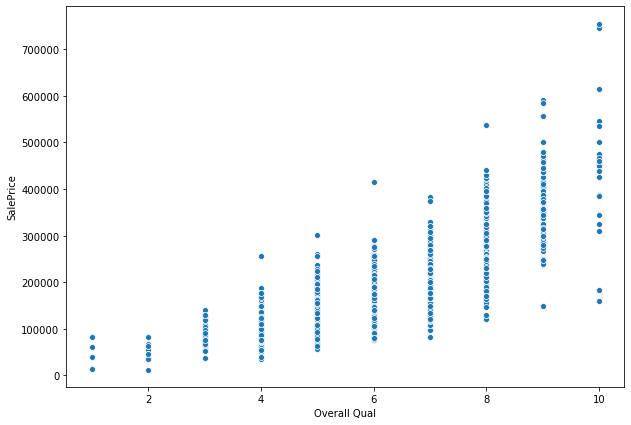

In [6]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=train, x="Overall Qual", y="SalePrice")

## 6. Fitting Univariate Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train[['Overall Qual']], train['SalePrice'])

a0 = lr.intercept_
a1 = lr.coef_

a0, a1

(-89311.54045190796, array([44174.67082795]))

The fitted model can be represented as: $ y = {44174.67082795x_1-89311.54045190796} $

## 7. Predicting with Univariate Linear Regression

In [8]:
from sklearn.metrics import mean_squared_error

train_predictions = lr.predict(train[['Overall Qual']])
test_predictions = lr.predict(test[['Overall Qual']])

train_mse = mean_squared_error(train_predictions, train['SalePrice'])
test_mse = mean_squared_error(test_predictions, test['SalePrice'])

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print('RMSE_train:', train_rmse)
print('RMSE_test:', test_rmse, '\n')
print('Mean_SalePrice:', train['SalePrice'].mean())
print('STD_SalePrice:', train['SalePrice'].std())

RMSE_train: 46744.71323214023
RMSE_test: 52878.67835801965 

Mean_SalePrice: 178582.20776450512
STD_SalePrice: 77125.07271273082


Well, considering that our error for both train and test set is within the standard deviation of the target attribute, this is not bad predictions at all!

## 8. Multiple Linear Regression
Let's add the second best feature, in terms of correlation, to our model: `Gr Liv Area`

<AxesSubplot:xlabel='Gr Liv Area', ylabel='SalePrice'>

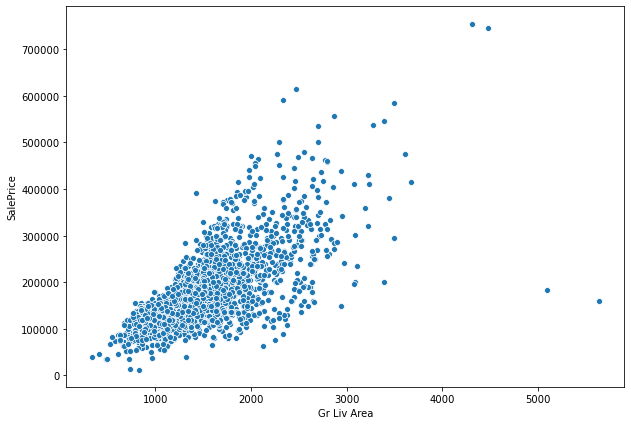

In [9]:
plt.figure(figsize=(10,7))
sns.scatterplot(data=train, x="Gr Liv Area", y="SalePrice")

In [10]:
cols = ['Overall Qual', 'Gr Liv Area']
lr.fit(train[cols], train['SalePrice'])
train_predictions = lr.predict(train[cols])
test_predictions = lr.predict(test[cols])

train_rmse_2 = np.sqrt(mean_squared_error(train_predictions, train['SalePrice']))
test_rmse_2 = np.sqrt(mean_squared_error(test_predictions, test['SalePrice']))

print('RMSE_train:', train_rmse_2)
print('RMSE_test:', test_rmse_2, '\n')
print('Mean_SalePrice:', train['SalePrice'].mean())
print('STD_SalePrice:', train['SalePrice'].std())

RMSE_train: 40342.086695425955
RMSE_test: 45336.691056820855 

Mean_SalePrice: 178582.20776450512
STD_SalePrice: 77125.07271273082


The 2nd feature improved out model